<center><h2>ATTENTION! Avant de démarrer, merci de suivre la procédure en 4 étapes ci-dessous pour le bon fonctionnement de la page</h2></center>
<b style="color:red;">1°) Cliquez sur le bouton "Sans Confiance"</b> 
<center><img src="./trust.png"></center>
<p>
<br></p>
<b style="color:red;">2°) Cliquer sur le bouton rouge "Faire Confiance" pour autoriser l'exécution des scripts de la page</b>
<center><img src="./trust2.png"></center>
<p>
<br></p>
<b style="color:red;">3°) Cliquez sur l'icone "redémarrer le noyau et ré-exécuter tout le notebook"</b>
<center><img src="./trust3.png"></center>
<p>
<br></p>
<b style="color:red;">4°) Cliquez sur le bouton rouge "Relancer et exécuter toutes les cellules" pour exécuter tous les programmes pythons déjà présents sur la page</b>
<center><img src="./trust4.png"></center>

<div id="Titre"></div>

# TP4 - Vitesse des Ultrasons + Mesure de distance

<h2>Travail demandé:</h2>

<ol><li> Inscrire vos réponses, programmes, images dans les blocs réponse prévus pour construire votre compte rendu</li>
<li> Vous pouvez tester et/ou modifier les différents morceaux de code proposés</li>
<li> Sauvegardez régulièrement votre travail. Attention, la sauvegarde se fait dans un espace temporaire et le fichier sera perdu au bout de quelques heures. </li>
<li> Téléchargez votre fichier au <b>format Notebook</b> si vous souhaitez pouvoir le <b>modifier plus tard</b>. Téléchargez le au <b> format html</b> si vous souhaitez simplement une <b>trace écrite</b> ou pour le rendre au professeur.</li></ol>

In [1]:
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_toggle') {
        $(this).hide();
        $(this).parent().next().find('div.input').hide();
        $(this).parent().next().find('div.output').hide();
       
      }
    });

    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
    if (id == 0 ){
      $(this).show();
            $(this).parent().next().find('div.input').show();
        $(this).parent().next().find('div.output').show();
    }
    });
    $('div.output_prompt').css('opacity', 1);
  
  }
  code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>''')
#<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# fonction pour cacher une cellule
# à exécuter une fois au début pour la mettre en mémoire

from IPython.display import HTML
import random



def hide_toggle(for_next=True,texte="Montrer/cacher"):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
  

    toggle_text = texte  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        js_hide_current = this_cell + '.find("div.input").hide();'+this_cell+ '.find("div.output").hide();'

    js_f_name = f'code_toggle_{random.randint(1,2**64)}'

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
                {cell_selector}.find('div.output').toggle();
                {this_cell}.find('div.input').hide();

            }}
             $('div.prompt').hide();
        </script>

        <form action="javascript:{f_name}()"><input type="submit" id="toggleButton" value={toggle_text}></form>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text,
        this_cell=this_cell
    )
    

    return HTML(html)




In [3]:
hide_toggle()

In [4]:
# Installation des bibliothèques à exécuter une fois au début
!pip install matplotlib
!pip install scipy


<h3>Matériel :</h3>
<ul><li>Arduino nano</li>
    <li>Breadboard</li>
    <li>Fils</li>
    <li>HC-SR04</li>
    <li>Ecran rigide</li>
    <li>Metre ruban</li>
    <li>Ordinateur</li></ul>
    <br>
<h3>Logiciels :</h3>
<ul><li>Navigateur web type Mozilla firefox</li>
    <li>IDE Arduino</li></ul>
    <br>

In [5]:
# imports à exécuter une fois au début
from math import pi
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sujet

<p>Nous avons ici regroupé plusieurs TPs, une mesure de la vitesse d'une onde (ici les ultrasons), puis une mesure de distance en utilisant un émetteur et un récepteur d'ultrasons.</p>

<h2>Partie 1 - Mesure de la vitesse des US</h2>
<p>Pour étudier la vitesse des ultrasons puis effectuer des mesures de distance, nous allons utiliser un émetteur récepteur d’ultrasons HC-SR04. Il sera relié à une carte Arduino suivant le <b>montage de la figure 1.</b> Réalisez ce montage sans relier la carte Arduino à l’ordinateur.</p>

<p><center><b>Figure 1. Montage à réaliser</b>
<img src="./TP4_figure1.png"></center></p>

<b>1°)</b> Ouvrez le programme <a href="./US.ino" target="_blank">US.ino</a> fourni et <b>téléversez le dans votre carte Arduino</b> (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur)</b>.<p>Sachant que le pin « trig » pilote l’émission d’une signal US à 40kHz et que le pin « echo » permet de détecter un retour, que fait ce programme ?</p>

<p>Installez un écran en face de l’émetteur-récepteur d’ultrasons à une distance d’exactement 1m (utilisez le mètre ruban). Ouvrez le moniteur série du logiciel Arduino et relevez 10 valeurs de temps consécutives renvoyées par le dispositif.</p>
<p><b>2°)</b> Le temps obtenu est-il exactement le même pour les 10 mesures ?</p>

<b>3°)</b> Stockez les 10 mesures de temps dans une liste <b style="color:red;">en python</b> puis construire l'histogramme correspondant à ces mesures.
<p>Vous pourrez utiliser la <a href="./methode_courbe.ipynb">fiche méthode</a> fournie.</p>

In [6]:
temps = []

<p>Le programme suivant permet de mettre en mémoire dans une liste <b>temps2</b> les 10000 mesures pour une expérience identique réalisée avec une distance d = 1,66 m, stockés sous forme d'un fichier csv.<p>

In [7]:
temps2 = []
f = open("./listetemps.csv","r")
data = f.readlines()
f.close()

data = data[1:]
temps2 = list(map(int,data))

<b>4°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de construire l'histogramme (avec 20 classes) pour ces mesures.

In [8]:
hide_toggle(texte="Correction")

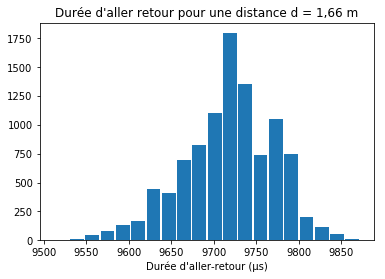

In [9]:
plt.hist(temps2,bins=20,rwidth=0.90)
plt.title("Durée d'aller retour pour une distance d = 1,66 m")
plt.xlabel("Durée d'aller-retour (µs)")
plt.show()

L'écart type se calcule par la formule:
$\sigma_{n-1}\ =\ \sqrt{\frac{\sum \limits_{1}^{n}{\big( x_i\ -\ \bar{x} \big)^2}}{n\ -\ 1}}$
<p>où $\bar x$ est la valeur moyenne sur la série de n mesures et $x_i$ la i<sup>ème</sup> valeur, obtenue.</p>
<p>Les bornes de l'intervalle de confiance à 95% sont données par $\bar{x}\ \pm\ \frac{k_{95\%}\ \sigma_{n-1}}{\sqrt{n}}$ où $k_{95\%}\ =\ 1{,}645$ vu le nombre de mesures réalisées.</p>
<p><b>5°)</b> Calculez <b style="color:red">sur python</b> puis afficher un encadrement du temps d'aller-retour mesuré lors de cette expérience.</p>

In [10]:
hide_toggle(texte="Correction")

In [11]:
#calcul de la moyenne
somme = 0
for val in temps2:
    somme += val
moyenne = somme / len(temps2)

#calcul de l'ecart type
somme = 0
for val in temps2:
    somme += (val - moyenne)**2
sigma = (somme/(len(temps2)-1))**0.5

k95 = 1.645

It = k95 * sigma / len(temps2)**0.5

print("Le temps d'aller-retour est entre {:.1f} et {:.1f} µs dans le cadre d'un intervalle de confiance de 95%".format(moyenne-It,moyenne+It))

Le temps d'aller-retour est entre 9716.2 et 9717.9 µs dans le cadre d'un intervalle de confiance de 95%


<p>La vitesse v est calculée en utilisant $v\ =\ \frac {d}{t}$ avec d la distance correspondant à un aller-retour (soit 2d) et t la moyenne du temps mesuré. </p>
<p>L'incertitude sur la mesure de la distance I<sub>d</sub> est de l'ordre de 2 cm. L'incertitude sur la mesure du temps I<sub>t</sub></p>
<p>L'incertitude sur la vitesse I<sub>v</sub> se calcule par $I_v\ =\ v \times\ \sqrt {\big(\frac{I_d}{d}\big)^2\ +\ \big(\frac{I_t}{t}\big)^2}$</p>
<b>6°)</b> Calculez <b style="color:red">sur python</b> puis afficher un encadrement de la vitesse des ultrasons dans l'air mesuré lors de cette expérience.</p>

In [12]:
hide_toggle(texte="Correction")

In [13]:
d = 1.66
Id = 0.02
v = (2 * d) / (moyenne*1e-6)

Iv = v * ((Id / (2 * d))**2 + (It / moyenne)**2)**0.5

print("La vitesse des US mesurée est entre {:.1f} et {:.1f} m/s dans le cadre d'un intervalle de confiance de 95%".format(v-Iv,v+Iv))

La vitesse des US mesurée est entre 339.6 et 343.7 m/s dans le cadre d'un intervalle de confiance de 95%


<b>7°)</b> Ouvrez le programme <a href="./US2.ino" target="_blank">US2.ino</a> fourni et <b>téléversez le dans votre carte Arduino</b> (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur)</b>.<p>Qu'apporte ce programme par rapport à US.ino ?</p>

<p><b>8°)</b> Mesurez le temps d'aller-retour des US entre le capteur et l'écran. Calculez <b style="color:red">sur python</b> la vitesse des US d'après cette expérience.</p>

In [14]:
hide_toggle(texte="Correction")

In [15]:
t = 9727.07 #µs
d = 1.66 #m

D = 2*d #Aller retour
v = D / (t / 1e6)
print("La vitesse mesurée par cette méthode est de {:.1f} m/s".format(v))

La vitesse mesurée par cette méthode est de 341.3 m/s


<h2>Partie 2 - Mesure de distance</h2>
<p><b>9°)</b> Ouvrez le programme <a href="./US3.ino" target="_blank">US3.ino</a> fourni. Modifiez le pour qu'il permette de réaliser des mesures de distance. <b>Téléversez le dans votre carte Arduino</b> (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur)</b>.

<b>10°)</b> En utilisant US2.ino et US3.ino, proposez un programme pour que la carte affiche une valeur de distance après avoir réalisé une moyenne sur 64 mesures. <b>Téléversez le dans votre carte Arduino</b> (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur)</b>. Pour chaque mesure, comparez la valeur donnée par le capteur et celui mesuré avec un mètre ruban.

<a href="./US3_cor.ino" target="_blank">correction</a>

<h2><a href="#Titre">Retour au début du TP</a></h2>